# Assignement 2 - Project Code
# Sriranjani Sridharan (R00182510)

## Code Section 1 - Pre processing

In [1]:
import numpy as np 
import pandas as pd
from sklearn import model_selection
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

### Import the input file income_evaluation.csv 

URL for dataset : https://www.kaggle.com/lodetomasi1995/income-classification

In [193]:
dataset = pd.read_csv("income_evaluation.csv")

col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

dataset.columns = col_names
dataset.head()


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


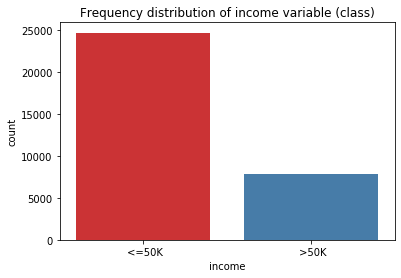

In [194]:
#frequency distribution of income variable
freqplt = sns.countplot(x="income", data=dataset, palette="Set1")
freqplt.set_title("Frequency distribution of income variable (class)")

plt.show();

### Identifying Missing values

In [195]:
categoricalFeatures = [col for col in dataset.columns if dataset[col].dtype=='O']
numericalFeatures = [col for col in dataset.columns if dataset[col].dtype!='O']

# print all unique values in the categorical features
for i in categoricalFeatures:
    print("unique values in column: ", i)
    print(dataset[i].unique())
    print('\n')

unique values in column:  workclass
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']


unique values in column:  education
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']


unique values in column:  marital_status
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']


unique values in column:  occupation
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']


unique values in column:  relationship
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']


unique values in column:

In [196]:
#Replace unknown charecters with missing values
dataset = dataset.replace(' ?', np.NaN)

print(dataset.isnull().sum())
dataset.shape

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64


(32561, 15)

### Handling Missing values

In [197]:
imputedf = dataset.copy()

#Replace missing categorical values with most frequent value
imputedf['workclass'] = imputedf['workclass'].fillna(imputedf['workclass'].mode()[0])
imputedf['occupation'] = imputedf['occupation'].fillna(imputedf['occupation'].mode()[0])
imputedf['native_country'] = imputedf['native_country'].fillna(imputedf['native_country'].mode()[0])
imputedf.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

### Observation and Conversion of 'native-country' field from Categorical to Binary

Number of instances with native country United States: 91.38 %


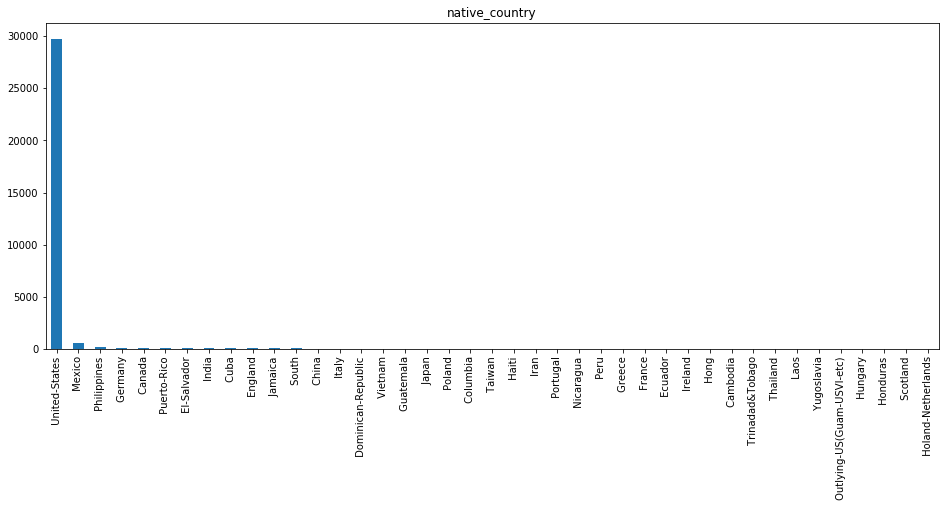

In [198]:
imputedf['native_country'].value_counts().plot(kind = 'bar', figsize=(16, 6), title = 'native_country')

percent = ((imputedf['native_country'] == ' United-States').sum()/ (len(imputedf))) * 100
print("Number of instances with native country United States: %5.2f %%" %(percent))

In [199]:
imputedf['native_country'] = imputedf['native_country'].apply(lambda x:  1 if x == ' United-States' else 0)
imputedf.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,1,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,1,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,1,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,1,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,0,<=50K


### Normalizing/Scaling numerical data

In [200]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer

featureData = imputedf.iloc[:,:-1]
targetData = imputedf.iloc[:,-1]

categoricalFeatures = [col for col in featureData.columns if featureData[col].dtype=='O']
numericalFeatures = [col for col in featureData.columns if featureData[col].dtype!='O']

preprocessor = ColumnTransformer(transformers = [('scl', MinMaxScaler(), numericalFeatures)], remainder='passthrough')
ScaledData = pd.DataFrame(preprocessor.fit_transform(featureData), columns = numericalFeatures + categoricalFeatures)

ScaledData.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,native_country,workclass,education,marital_status,occupation,relationship,race,sex
0,0.30137,0.0443019,0.8,0.0217402,0,0.397959,1,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male
1,0.452055,0.0482376,0.8,0,0,0.122449,1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male
2,0.287671,0.138113,0.533333,0,0,0.397959,1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male
3,0.493151,0.151068,0.4,0,0,0.397959,1,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male
4,0.150685,0.221488,0.8,0,0,0.397959,0,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female


### Observation of Outliers

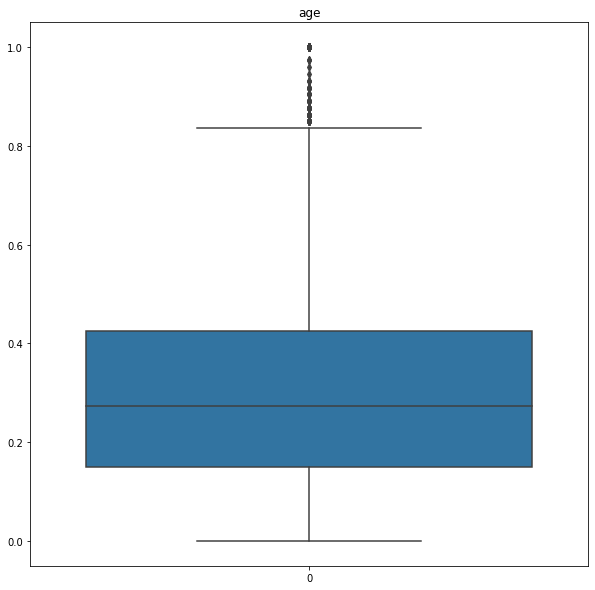

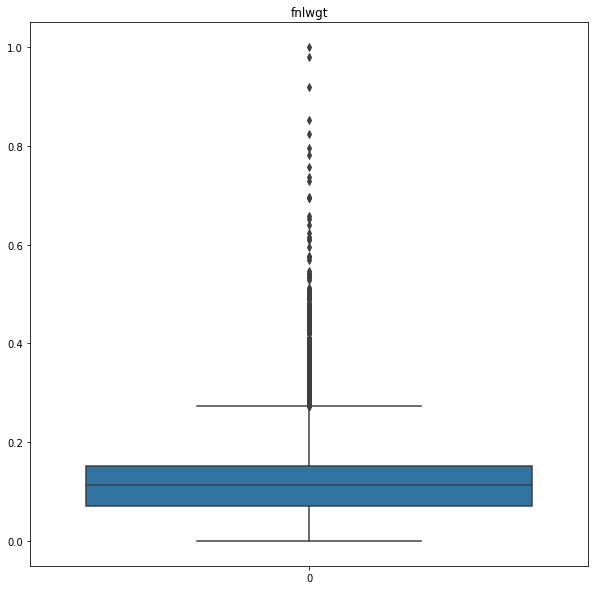

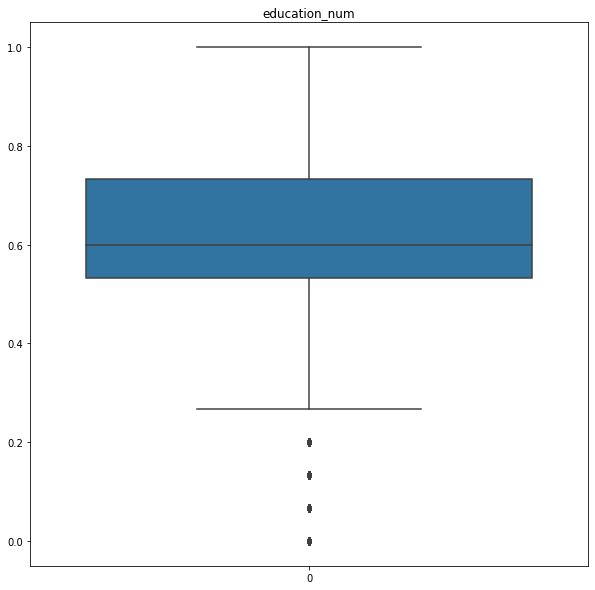

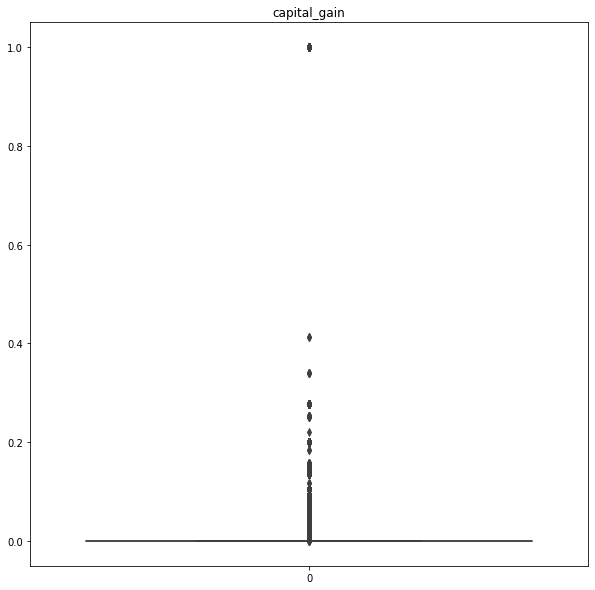

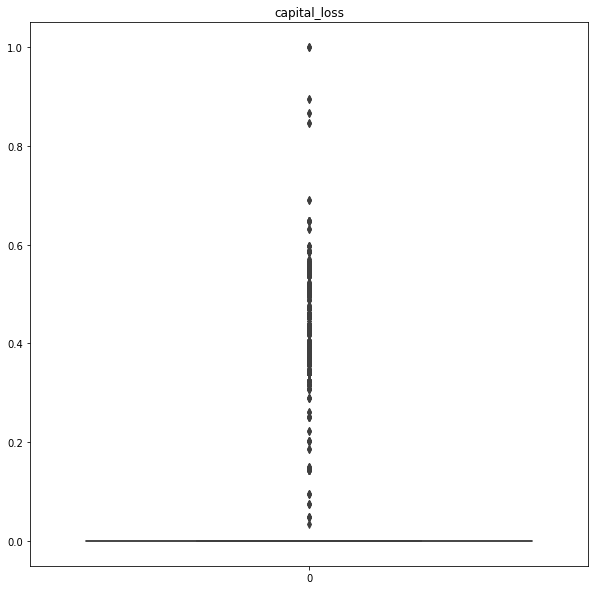

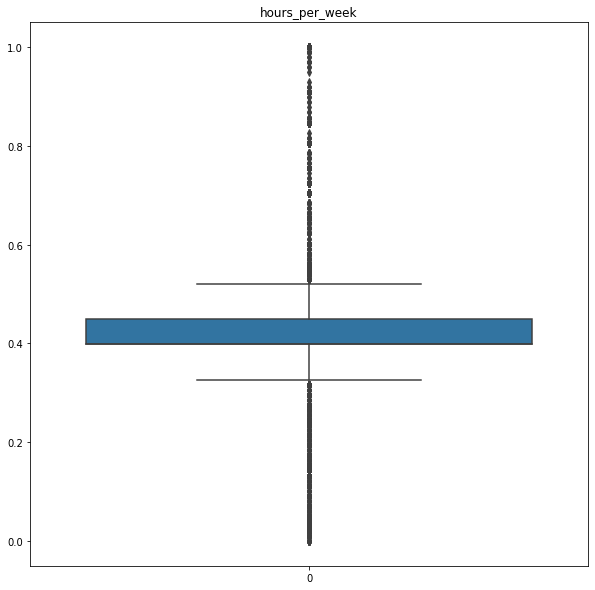

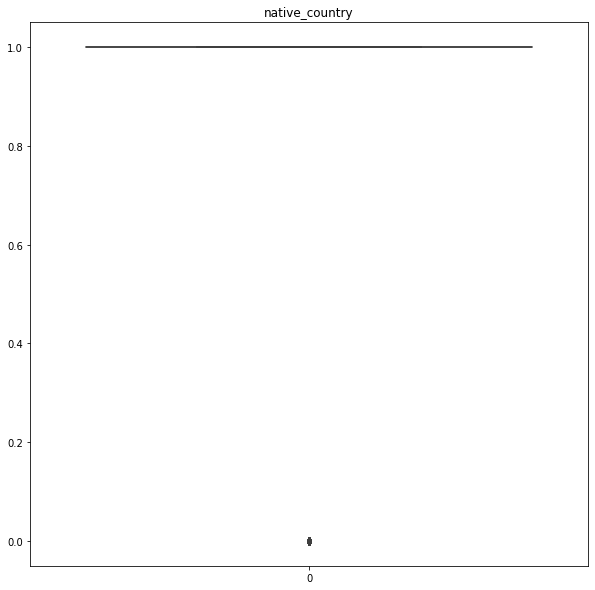

In [190]:
for i in numericalFeatures:
    plt.figure(figsize=(10, 10))
    sns.boxplot(data= ScaledData[i]).set_title(i)
    plt.show();

### Handling Outliers

In [191]:
# drop the outlier values in field capital-gain
print(ScaledData.shape)
print(targetData.shape)
indices = ScaledData[(ScaledData['capital_gain'] == 1.0)].index
ScaledData.drop(indices, inplace = True)
targetData.drop(indices, inplace = True)
print(ScaledData.shape)
print(targetData.shape)

(32561, 14)
(32561,)
(32402, 14)
(32402,)


### One Hot Encoding Categorical variables

In [275]:
preprocessor = ColumnTransformer(transformers = [('cat1', OneHotEncoder(sparse="False"), categoricalFeatures)]
                                , remainder='passthrough')

transformedData = preprocessor.fit_transform(ScaledData).toarray()

# Make the class labels to be a binary variable as there are only 2 classes
classData = np.array(targetData.map({' <=50K':0, ' >50K':1}))

col_names = categoricalFeatures + numericalFeatures

print(transformedData.shape)
print(classData.shape)
cat_col_names = preprocessor.named_transformers_['cat1'].get_feature_names()

col_names_ohe = cat_col_names.tolist() + numericalFeatures

df_ohe = pd.DataFrame(transformedData, columns = col_names_ohe)

print('\nData after one hot encoding')
df_ohe.head()

(32561, 65)
(32561,)

Data after one hot encoding


,x0_ Federal-gov,x0_ Local-gov,x0_ Never-worked,x0_ Private,x0_ Self-emp-inc,x0_ Self-emp-not-inc,x0_ State-gov,x0_ Without-pay,x1_ 10th,x1_ 11th,...,x5_ White,x6_ Female,x6_ Male,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,native_country
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.301370,0.044302,0.800000,0.02174,0.0,0.397959,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.452055,0.048238,0.800000,0.00000,0.0,0.122449,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.287671,0.138113,0.533333,0.00000,0.0,0.397959,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.493151,0.151068,0.400000,0.00000,0.0,0.397959,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.150685,0.221488,0.800000,0.00000,0.0,0.397959,0.0


## Code Section 2 - Baseline model Evaluation

#### Decision Tree Classifier

In [432]:
Baseline_model_results = dict()
allResults= []

kf= model_selection.StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

for train_index, test_index in kf.split(transformedData, classData):
    clf= tree.DecisionTreeClassifier(random_state=1)
    clf= clf.fit(transformedData[train_index], classData[train_index])

    # predict the class for an unseen example
    results= clf.predict(transformedData[test_index])
    allResults.append(metrics.accuracy_score(results, classData[test_index]))

accuracy = (np.mean(allResults) * 100)
Baseline_model_results['Decision Tree'] = accuracy
print("Accuracy for Decision Tree is ", accuracy)


Accuracy for Decision Tree is  81.45637085574144


#### Linear SVC Classifier (Support vector with linear kernel)

In [433]:
from sklearn.svm import LinearSVC

allResults= []

kf= model_selection.StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

for train_index, test_index in kf.split(transformedData, classData):
    clf= LinearSVC(random_state=0)
    clf= clf.fit(transformedData[train_index], classData[train_index])

    # predict the class for an unseen example
    results= clf.predict(transformedData[test_index])
    allResults.append(metrics.accuracy_score(results, classData[test_index]))

accuracy = (np.mean(allResults) * 100)
Baseline_model_results['Linear SVC'] = accuracy
print ("Accuracy for Linear SVC is ", accuracy)

Accuracy for Linear SVC is  85.10795496979101


#### Random Forest Classifier

In [434]:
from sklearn.ensemble import RandomForestClassifier

allResults= []

kf= model_selection.StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

for train_index, test_index in kf.split(transformedData, classData):
    clf= RandomForestClassifier(random_state=0)
    clf= clf.fit(transformedData[train_index], classData[train_index])

    # predict the class for an unseen example
    results= clf.predict(transformedData[test_index])
    allResults.append(metrics.accuracy_score(results, classData[test_index]))

accuracy = (np.mean(allResults) * 100)
Baseline_model_results['Random Forest'] = accuracy
print ("Accuracy for Random Forest is ", accuracy)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: T

Accuracy for Random Forest is  84.69336692317964


#### Support vector Classifier

In [435]:
from sklearn.svm import SVC

allResults= []

kf= model_selection.StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

for train_index, test_index in kf.split(transformedData, classData):
    clf = SVC(gamma='auto', random_state = 0)
    clf= clf.fit(transformedData[train_index], classData[train_index])

    # predict the class for an unseen example
    results= clf.predict(transformedData[test_index])
    allResults.append(metrics.accuracy_score(results, classData[test_index]))

accuracy = (np.mean(allResults) * 100)
Baseline_model_results['SVM'] = accuracy
print ("Accuracy for SVM is ", accuracy)

Accuracy for SVM is  83.02571988210612


#### Naive Bayes Classifier

In [436]:
from sklearn.naive_bayes import MultinomialNB

allResults= []

kf= model_selection.StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

for train_index, test_index in kf.split(transformedData, classData):
    clf= MultinomialNB()
    clf= clf.fit(transformedData[train_index], classData[train_index])

    # predict the class for an unseen example
    results= clf.predict(transformedData[test_index])
    allResults.append(metrics.accuracy_score(results, classData[test_index]))

accuracy = (np.mean(allResults) * 100)
Baseline_model_results['Naive Bayes'] = accuracy
print ("Accuracy for Naive Bayes is ", accuracy)

Accuracy for Naive Bayes is  79.11919347404456


#### KNN Classifier

In [437]:
from sklearn.neighbors import KNeighborsClassifier

allResults= []

kf= model_selection.StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

for train_index, test_index in kf.split(transformedData, classData):
    clf= KNeighborsClassifier()
    clf= clf.fit(transformedData[train_index], classData[train_index])

    # predict the class for an unseen example
    results= clf.predict(transformedData[test_index])
    allResults.append(metrics.accuracy_score(results, classData[test_index]))

accuracy = (np.mean(allResults) * 100)
Baseline_model_results['KNN'] = accuracy
print ("Accuracy for KNN is ", accuracy)

Accuracy for KNN is  82.50363892097083


#### Logistic Regression Classifier

In [438]:
from sklearn.linear_model import LogisticRegression

allResults= []

kf= model_selection.StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

for train_index, test_index in kf.split(transformedData, classData):
    clf= LogisticRegression(random_state=0)
    clf= clf.fit(transformedData[train_index], classData[train_index])

    # predict the class for an unseen example
    results= clf.predict(transformedData[test_index])
    allResults.append(metrics.accuracy_score(results, classData[test_index]))

accuracy = (np.mean(allResults) * 100)
Baseline_model_results['Logistic Regression'] = accuracy
print ("Accuracy for Logistic Regression is ", accuracy)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

Accuracy for Logistic Regression is  84.92675292452695


#### Gradient Boosting Classifier

In [439]:
from sklearn.ensemble import GradientBoostingClassifier

allResults= []

kf= model_selection.StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

for train_index, test_index in kf.split(transformedData, classData):
    clf= GradientBoostingClassifier(random_state=0)
    clf= clf.fit(transformedData[train_index], classData[train_index])

    # predict the class for an unseen example
    results= clf.predict(transformedData[test_index])
    allResults.append(metrics.accuracy_score(results, classData[test_index]))

accuracy = (np.mean(allResults) * 100)
Baseline_model_results['Gradient Boosting'] = accuracy
print ("Accuracy for Gradient Boosting is ", accuracy)

Accuracy for Gradient Boosting is  86.5636949786474


### Baseline Models Accuracy Evaluation (Report section 4.1)

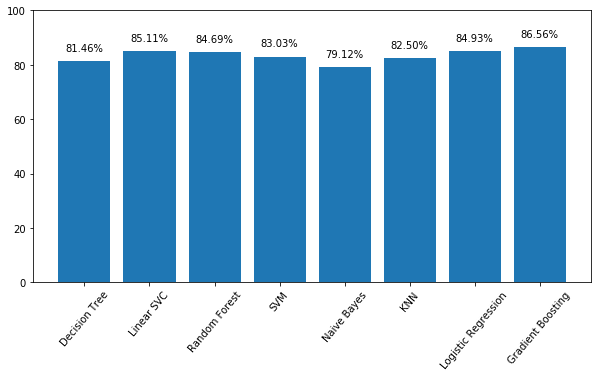

In [440]:
plt.figure(figsize=(10,5))
plt.bar(*zip(*Baseline_model_results.items()))
#plt.title('Baseline Model Accuracies')

for x, y in (Baseline_model_results.items()):
    label = "{:2.2f}%".format(y)
    
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center


plt.xticks(rotation=50)
plt.yticks(np.arange(0,120,20))
plt.show();

## Code Section 3 - Hyper parameter Optimization

### Top 3 Models Selected: Linear SVC, Random Forest, Gradiant Boosting

#### Linear SVC Hyper parameter optimization (Report section 4.2.1)

In [447]:
#Report section 4.2.1

LinSVC = LinearSVC(random_state = 0)
scores_LinSVC = model_selection.cross_val_score(LinSVC, transformedData, classData, cv=10)
print (scores_LinSVC.mean())

param_grid= [ {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000], 'intercept_scaling' : [2, 4, 5, 10]}  ]
LinSVCclf= GridSearchCV(LinearSVC(random_state = 0, max_iter = 5000, dual = False), param_grid, cv=10)
LinSVCclf.fit(transformedData, classData)
print("\n Best parameters set found on development set:")
print(LinSVCclf.best_params_ , "with a score of ", LinSVCclf.best_score_)


0.8510796817137007

 Best parameters set found on development set:
{'C': 100, 'intercept_scaling': 5} with a score of  0.8512637818248825


In [450]:
LinSVC = LinearSVC(random_state = 0)
scores_LinSVC = model_selection.cross_val_score(LinSVC, transformedData, classData, cv=10)
print (scores_LinSVC.mean())

param_grid= [ {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000], 'intercept_scaling' : [2, 4, 5, 10]}  ]
LinSVCclf= GridSearchCV(LinearSVC(random_state = 0, max_iter = 5000, dual = False, penalty = 'l1'), param_grid, cv=10)
LinSVCclf.fit(transformedData, classData)
print("\n Best parameters set found on development set:")
print(LinSVCclf.best_params_ , "with a score of ", LinSVCclf.best_score_)


0.8510796817137007


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn


 Best parameters set found on development set:
{'C': 1, 'intercept_scaling': 2} with a score of  0.8512637818248825


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


#### Random Forest Hyper parameter Optimization (Report section 4.2.2)

In [143]:
RandomForest = RandomForestClassifier(random_state = 0)
scores_RF = model_selection.cross_val_score(RandomForest, transformedData, classData, cv=10)
print (scores_RF.mean())

param_grid= [{'bootstrap': [True],
               'max_features': [2, 3],
               'n_estimators': [100, 200, 300, 1000],
                'max_depth': [80, 90, 100, 110],
                'min_samples_leaf': [3, 4, 5],
                'min_samples_split': [8, 10, 12]}]

RFclf= GridSearchCV(RandomForestClassifier(), param_grid, cv=10)
RFclf.fit(transformedData, classData)
print("\n Best parameters set found on development set:")
print(RFclf.best_params_ , "with a score of ", RFclf.best_score_)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: T

0.8462438814418656

 Best parameters set found on development set:
{'bootstrap': True, 'max_depth': 90, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 1000} with a score of  0.8585889759891365


#### Gradient Boosting Hyper parameter optimization (Report Section 4.2.3)

In [144]:
# Report section 4.2.3

Gradboost = GradientBoostingClassifier(random_state = 0)
scores_GB1 = model_selection.cross_val_score(Gradboost, transformedData, classData, cv=10)
print (scores_GB1.mean())

param_grid= [{'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001]}]

GB1clf= GridSearchCV(GradientBoostingClassifier(random_state = 0), param_grid, cv=10)
GB1clf.fit(transformedData, classData)
print("\n Best parameters set found on development set:")
print(GB1clf.best_params_ , "with a score of ", GB1clf.best_score_)

0.8649468709169934

 Best parameters set found on development set:
{'learning_rate': 0.15} with a score of  0.8679402506018147


In [145]:
Gradboost = GradientBoostingClassifier(random_state = 0)
scores_GB2 = model_selection.cross_val_score(Gradboost, transformedData, classData, cv=10)
print (scores_GB2.mean())

param_grid= [{'n_estimators':[100,250,500,750,1000,1250,1500,175]}]

GB2clf= GridSearchCV(GradientBoostingClassifier(random_state = 0), param_grid, cv=10)
GB2clf.fit(transformedData, classData)
print("\n Best parameters set found on development set:")
print(GB2clf.best_params_ , "with a score of ", GB2clf.best_score_)

0.8649468709169934

 Best parameters set found on development set:
{'n_estimators': 500} with a score of  0.8728164928090859


In [146]:
Gradboost = GradientBoostingClassifier(random_state = 0)
scores_GB3 = model_selection.cross_val_score(Gradboost, transformedData, classData, cv=10)
print (scores_GB3.mean())

param_grid= [{'max_depth':[1,3,5,6,7,9]}]

GB3clf= GridSearchCV(GradientBoostingClassifier(random_state = 0), param_grid, cv=10)
GB3clf.fit(transformedData, classData)
print("\n Best parameters set found on development set:")
print(GB3clf.best_params_ , "with a score of ", GB3clf.best_score_)

0.8649468709169934

 Best parameters set found on development set:
{'max_depth': 6} with a score of  0.8723535584223197


In [140]:
Gradboost = GradientBoostingClassifier(random_state = 0)
scores_GB4 = model_selection.cross_val_score(Gradboost, transformedData, classData, cv=10)
print (scores_GB4.mean())

param_grid= [{'max_features':[3,4,5,6,7]}]

GB4clf= GridSearchCV(GradientBoostingClassifier(learning_rate = 0.15, random_state = 0, n_estimators = 750, max_depth = 6), param_grid, cv=10)
GB4clf.fit(transformedData, classData)
print("\n Best parameters set found on development set:")
print(GB4clf.best_params_ , "with a score of ", GB4clf.best_score_)

0.8649468709169934

 Best parameters set found on development set:
{'max_features': 4} with a score of  0.8651626442812173


#### Best reported model throughout - Gradient Boosting with 87.3% accuracy

In [452]:
from sklearn.ensemble import GradientBoostingClassifier

allResults= []

kf= model_selection.StratifiedKFold(n_splits=6, shuffle=True, random_state=1)

for train_index, test_index in kf.split(transformedData, classData):
    clf= GradientBoostingClassifier(random_state=0, learning_rate = 0.15, n_estimators = 500)
    clf= clf.fit(transformedData[train_index], classData[train_index])

    # predict the class for an unseen example
    results= clf.predict(transformedData[test_index])
    allResults.append(metrics.accuracy_score(results, classData[test_index]))

print ("Accuracy is ", np.mean(allResults))

Accuracy is  0.8733145397321139


## Code Section 4 - Research on Feature Selection Techniques

### Filter Methods

#### Select Percentile with f-classif/ANOVA statistic (Report section 4.3.1)

In [387]:
# Report section 4.3.1
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_classif

selector = SelectPercentile(f_classif, percentile=70)
selector.fit(transformedData, classData)

featuredf = pd.DataFrame()
featuredf['col_name_ohe'] = col_names_ohe 
featuredf['score'] = selector.scores_ 

print(featuredf)

print('\nShape before feature reduction')
print(transformedData.shape)

new_data = selector.transform(transformedData)
print('\nShape after feature reduction')
print(new_data.shape)

##Implement the Linear SVC model for the new feature selected/transformed data

Feat_Select1 = dict()

## 1) Linear SVC
allResults= []

kf= model_selection.StratifiedKFold(n_splits=6, shuffle=True, random_state=1)

for train_index, test_index in kf.split(new_data, classData):
    clf= LinearSVC(random_state=0)
    clf= clf.fit(new_data[train_index], classData[train_index])

    # predict the class for an unseen example
    results= clf.predict(new_data[test_index])
    allResults.append(metrics.accuracy_score(results, classData[test_index]))

accuracy = (np.mean(allResults) * 100)
Feat_Select1['Linear SVC'] = accuracy
print ("\nAccuracy for Linear SVC is ", accuracy)



## 2) Random Forest
allResults= []

kf= model_selection.StratifiedKFold(n_splits=6, shuffle=True, random_state=1)

for train_index, test_index in kf.split(transformedData, classData):
    clf= RandomForestClassifier(random_state=0)
    clf= clf.fit(transformedData[train_index], classData[train_index])

    # predict the class for an unseen example
    results= clf.predict(transformedData[test_index])
    allResults.append(metrics.accuracy_score(results, classData[test_index]))

accuracy = (np.mean(allResults) * 100)
Feat_Select1['Random Forest'] = accuracy
print ("Accuracy for Random Forest is ", accuracy)


# 3) Gradient Boosting
allResults= []

kf= model_selection.StratifiedKFold(n_splits=6, shuffle=True, random_state=1)

for train_index, test_index in kf.split(new_data, classData):
    clf= GradientBoostingClassifier(random_state=0)
    clf= clf.fit(new_data[train_index], classData[train_index])

    # predict the class for an unseen example
    results= clf.predict(new_data[test_index])
    allResults.append(metrics.accuracy_score(results, classData[test_index]))

accuracy = (np.mean(allResults) * 100)
Feat_Select1['Gradient Boosting'] = accuracy
print ("Accuracy for Gradient Boosting is ", accuracy)

                 col_name_ohe        score
0             x0_ Federal-gov   115.176608
1               x0_ Local-gov    35.690728
2            x0_ Never-worked     2.220840
3                 x0_ Private   521.636151
4            x0_ Self-emp-inc   645.865197
5        x0_ Self-emp-not-inc    29.366798
6               x0_ State-gov     7.175086
7             x0_ Without-pay     4.442939
8                    x1_ 10th   160.498930
9                    x1_ 11th   241.827820
10                   x1_ 12th    65.157339
11                x1_ 1st-4th    38.898653
12                x1_ 5th-6th    68.519016
13                x1_ 7th-8th   115.770564
14                    x1_ 9th   101.574622
15             x1_ Assoc-acdm     0.343969
16              x1_ Assoc-voc     3.287420
17              x1_ Bachelors  1096.321775
18              x1_ Doctorate   582.472539
19                x1_ HS-grad   570.167351
20                x1_ Masters  1023.409969
21              x1_ Preschool    16.209268
22         

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: T

Accuracy for Random Forest is  84.75476695873361
Accuracy for Gradient Boosting is  86.48381641867338


##### Feature scores for Select Percentile with f-classif/ANOVA statistic

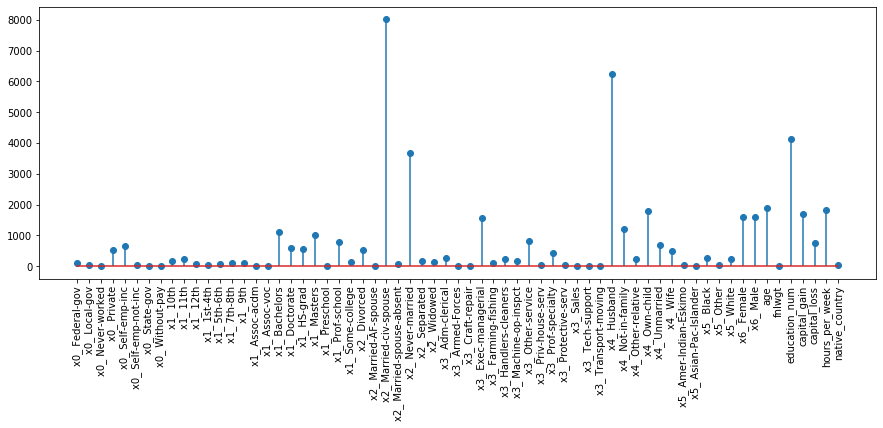

In [403]:
x = featuredf['col_name_ohe']
y = featuredf['score']

plt.figure(figsize=(15,5))
plt.stem(x, y, use_line_collection=True)

plt.xticks(rotation = 90)

plt.show();


##### Accuracy across top 3 models for Select Percentile with f-classif/ANOVA statistic (Report section 4.3.1)

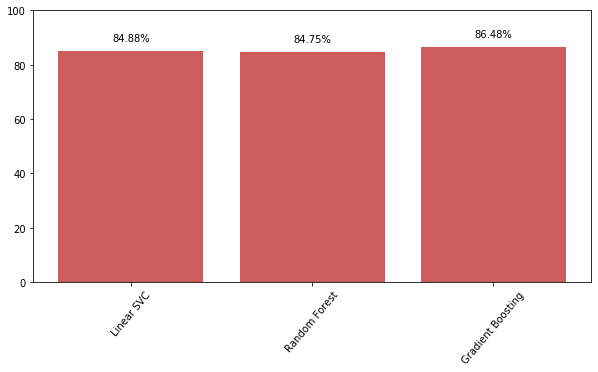

In [413]:
# Report section 4.3.1
plt.figure(figsize=(10,5))
plt.bar(*zip(*Feat_Select1.items()), color = 'indianred')

for x, y in (Feat_Select1.items()):
    label = "{:2.2f}%".format(y)
    
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center


plt.xticks(rotation=50)
plt.yticks(np.arange(0,120,20))
plt.show();

#### Select Percentile with chi square statistic

In [414]:
# Report section 4.3.1
from sklearn.feature_selection import chi2

selector = SelectPercentile(chi2, percentile=60)
selector.fit(transformedData, classData)


featuredf = pd.DataFrame()
featuredf['col_name_ohe'] = col_names_ohe 
featuredf['score'] = selector.scores_ 

print(featuredf)

print('\nShape before feature reduction')
print(transformedData.shape)

new_data = selector.transform(transformedData)
print('\nShape after feature reduction')
print(new_data.shape)

##Implement the Linear SVC model for the new feature selected data

Feat_Select2 = dict()

## 1) Linear SVC
allResults= []

kf= model_selection.StratifiedKFold(n_splits=6, shuffle=True, random_state=1)

for train_index, test_index in kf.split(new_data, classData):
    clf= LinearSVC(random_state=0)
    clf= clf.fit(new_data[train_index], classData[train_index])

    # predict the class for an unseen example
    results= clf.predict(new_data[test_index])
    allResults.append(metrics.accuracy_score(results, classData[test_index]))

accuracy = (np.mean(allResults) * 100)
Feat_Select2['Linear SVC'] = accuracy
print ("Accuracy for Linear SVC is ", accuracy)



## 2) Random Forest
allResults= []

kf= model_selection.StratifiedKFold(n_splits=6, shuffle=True, random_state=1)

for train_index, test_index in kf.split(transformedData, classData):
    clf= RandomForestClassifier(random_state=0)
    clf= clf.fit(transformedData[train_index], classData[train_index])

    # predict the class for an unseen example
    results= clf.predict(transformedData[test_index])
    allResults.append(metrics.accuracy_score(results, classData[test_index]))

accuracy = (np.mean(allResults) * 100)
Feat_Select2['Random Forest'] = accuracy
print ("Accuracy for Random Forest is ", accuracy)


# 3) Gradient Boosting
allResults= []

kf= model_selection.StratifiedKFold(n_splits=6, shuffle=True, random_state=1)

for train_index, test_index in kf.split(new_data, classData):
    clf= GradientBoostingClassifier(random_state=0)
    clf= clf.fit(new_data[train_index], classData[train_index])

    # predict the class for an unseen example
    results= clf.predict(new_data[test_index])
    allResults.append(metrics.accuracy_score(results, classData[test_index]))

accuracy = (np.mean(allResults) * 100)
Feat_Select2['Gradient Boosting'] = accuracy
print ("Accuracy for Gradient Boosting is ", accuracy)


                 col_name_ohe        score
0             x0_ Federal-gov   111.393656
1               x0_ Local-gov    33.362031
2            x0_ Never-worked     2.220348
3                 x0_ Private   126.606291
4            x0_ Self-emp-inc   611.634199
5        x0_ Self-emp-not-inc    27.052331
6               x0_ State-gov     6.887967
7             x0_ Without-pay     4.440696
8                    x1_ 10th   155.144802
9                    x1_ 11th   231.396842
10                   x1_ 12th    64.166408
11                x1_ 1st-4th    38.654150
12                x1_ 5th-6th    67.680011
13                x1_ 7th-8th   113.078607
14                    x1_ 9th    99.666401
15             x1_ Assoc-acdm     0.332715
16              x1_ Assoc-voc     3.147766
17              x1_ Bachelors   886.235182
18              x1_ Doctorate   565.011925
19                x1_ HS-grad   379.662176
20                x1_ Masters   939.775218
21              x1_ Preschool    16.176820
22         

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: T

Accuracy for Random Forest is  84.75476695873361
Accuracy for Gradient Boosting is  86.49303470588066


##### Feature Scores for Select Percentile with chi square statistic

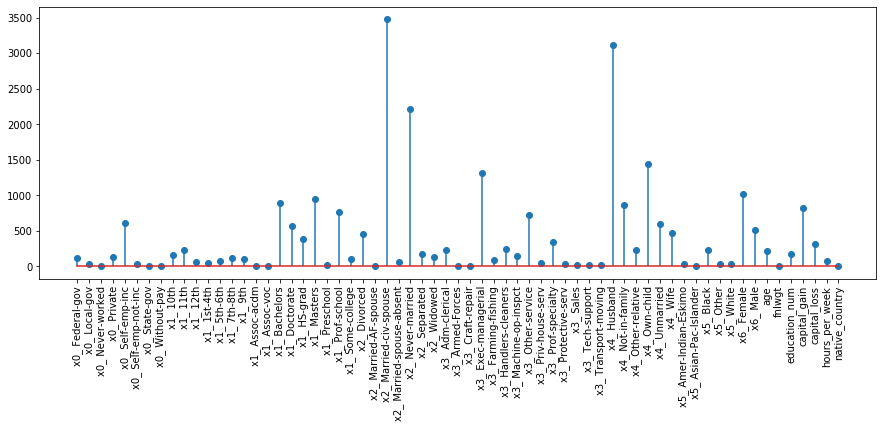

In [415]:
x = featuredf['col_name_ohe']
y = featuredf['score']

plt.figure(figsize=(15,5))
plt.stem(x, y, use_line_collection=True)

plt.xticks(rotation = 90)

plt.show();


##### Accuracy across top 3 models for Select Percentile with chi square statistic (Report section 4.3.1)

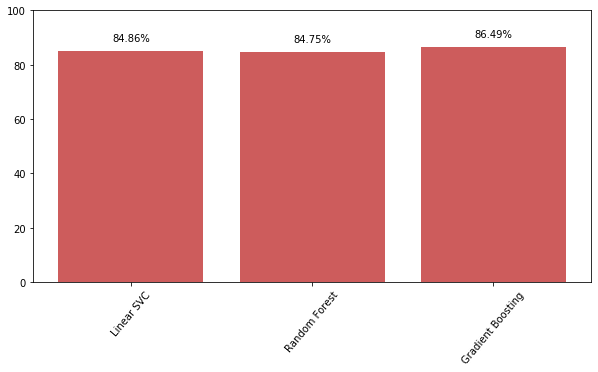

In [416]:
# Report section 4.3.1
plt.figure(figsize=(10,5))
plt.bar(*zip(*Feat_Select2.items()), color = 'indianred')

for x, y in (Feat_Select2.items()):
    label = "{:2.2f}%".format(y)
    
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center


plt.xticks(rotation=50)
plt.yticks(np.arange(0,120,20))
plt.show();

#### SelectkBest with chi squared statistic

In [417]:
# Report section 4.3.1
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

selector = SelectKBest(chi2, k=40)
selector.fit(transformedData, classData)


featuredf = pd.DataFrame()
featuredf['col_name_ohe'] = col_names_ohe 
featuredf['score'] = selector.scores_ 

print(featuredf)

print('\nShape before feature reduction')
print(transformedData.shape)

new_data = selector.transform(transformedData)
print('\nShape after feature reduction')
print(new_data.shape)

##Implement the Linear SVC model for the new feature selected data

Feat_Select3 = dict()

## 1) Linear SVC
allResults= []

kf= model_selection.StratifiedKFold(n_splits=6, shuffle=True, random_state=1)

for train_index, test_index in kf.split(new_data, classData):
    clf= LinearSVC(random_state=0)
    clf= clf.fit(new_data[train_index], classData[train_index])

    # predict the class for an unseen example
    results= clf.predict(new_data[test_index])
    allResults.append(metrics.accuracy_score(results, classData[test_index]))

accuracy = (np.mean(allResults) * 100)
Feat_Select3['Linear SVC'] = accuracy
print ("Accuracy for Linear SVC is ", accuracy)



## 2) Random Forest
allResults= []

kf= model_selection.StratifiedKFold(n_splits=6, shuffle=True, random_state=1)

for train_index, test_index in kf.split(transformedData, classData):
    clf= RandomForestClassifier(random_state=0)
    clf= clf.fit(transformedData[train_index], classData[train_index])

    # predict the class for an unseen example
    results= clf.predict(transformedData[test_index])
    allResults.append(metrics.accuracy_score(results, classData[test_index]))

accuracy = (np.mean(allResults) * 100)
Feat_Select3['Random Forest'] = accuracy
print ("Accuracy for Random Forest is ", accuracy)


# 3) Gradient Boosting
allResults= []

kf= model_selection.StratifiedKFold(n_splits=6, shuffle=True, random_state=1)

for train_index, test_index in kf.split(new_data, classData):
    clf= GradientBoostingClassifier(random_state=0)
    clf= clf.fit(new_data[train_index], classData[train_index])

    # predict the class for an unseen example
    results= clf.predict(new_data[test_index])
    allResults.append(metrics.accuracy_score(results, classData[test_index]))

accuracy = (np.mean(allResults) * 100)
Feat_Select3['Gradient Boosting'] = accuracy
print ("Accuracy for Gradient Boosting is ", accuracy)


                 col_name_ohe        score
0             x0_ Federal-gov   111.393656
1               x0_ Local-gov    33.362031
2            x0_ Never-worked     2.220348
3                 x0_ Private   126.606291
4            x0_ Self-emp-inc   611.634199
5        x0_ Self-emp-not-inc    27.052331
6               x0_ State-gov     6.887967
7             x0_ Without-pay     4.440696
8                    x1_ 10th   155.144802
9                    x1_ 11th   231.396842
10                   x1_ 12th    64.166408
11                x1_ 1st-4th    38.654150
12                x1_ 5th-6th    67.680011
13                x1_ 7th-8th   113.078607
14                    x1_ 9th    99.666401
15             x1_ Assoc-acdm     0.332715
16              x1_ Assoc-voc     3.147766
17              x1_ Bachelors   886.235182
18              x1_ Doctorate   565.011925
19                x1_ HS-grad   379.662176
20                x1_ Masters   939.775218
21              x1_ Preschool    16.176820
22         

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: T

Accuracy for Random Forest is  84.75476695873361
Accuracy for Gradient Boosting is  86.4961057703116


##### Feature Scores for SelectkBest with chi squared statistic (Report section 4.3.1)

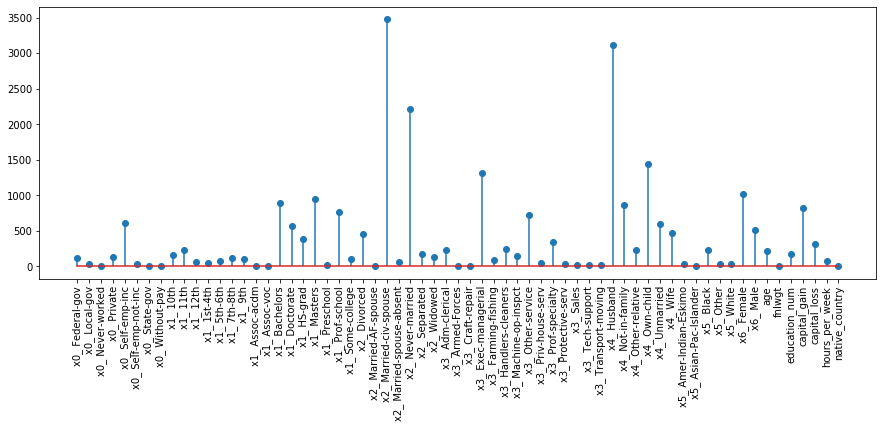

In [418]:
# Report section 4.3.1
x = featuredf['col_name_ohe']
y = featuredf['score']

plt.figure(figsize=(15,5))
plt.stem(x, y, use_line_collection=True)

plt.xticks(rotation = 90)

plt.show();


##### Accuracy across top 3 models for SelectkBest with chi squared statistic (Report section 4.3.1)

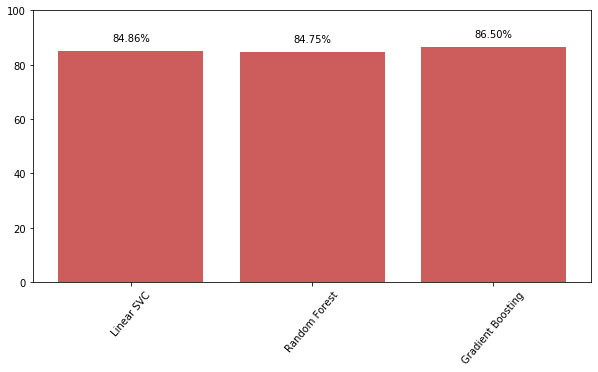

In [419]:
# Report section 4.3.1
plt.figure(figsize=(10,5))
plt.bar(*zip(*Feat_Select3.items()), color = 'indianred')

for x, y in (Feat_Select3.items()):
    label = "{:2.2f}%".format(y)
    
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center


plt.xticks(rotation=50)
plt.yticks(np.arange(0,120,20))
plt.show();

#### SelectKBest with mutual info statistic

In [420]:
# Report section 4.3.1
from sklearn.feature_selection import mutual_info_classif

selector = SelectKBest(mutual_info_classif, k=40)
selector.fit(transformedData, classData)

featuredf = pd.DataFrame()
featuredf['col_name_ohe'] = col_names_ohe 
featuredf['score'] = selector.scores_ 

print(featuredf)

print('\nShape before feature reduction')
print(transformedData.shape)

new_data = selector.transform(transformedData)
print('\nShape after feature reduction')
print(new_data.shape)

##Implement the Linear SVC model for the new feature selected data

Feat_Select4 = dict()

## 1) Linear SVC
allResults= []

kf= model_selection.StratifiedKFold(n_splits=6, shuffle=True, random_state=1)

for train_index, test_index in kf.split(new_data, classData):
    clf= LinearSVC(random_state=0)
    clf= clf.fit(new_data[train_index], classData[train_index])

    # predict the class for an unseen example
    results= clf.predict(new_data[test_index])
    allResults.append(metrics.accuracy_score(results, classData[test_index]))

accuracy = (np.mean(allResults) * 100)
Feat_Select4['Linear SVC'] = accuracy
print ("Accuracy for Linear SVC is ", accuracy)



## 2) Random Forest
allResults= []

kf= model_selection.StratifiedKFold(n_splits=6, shuffle=True, random_state=1)

for train_index, test_index in kf.split(transformedData, classData):
    clf= RandomForestClassifier(random_state=0)
    clf= clf.fit(transformedData[train_index], classData[train_index])

    # predict the class for an unseen example
    results= clf.predict(transformedData[test_index])
    allResults.append(metrics.accuracy_score(results, classData[test_index]))

accuracy = (np.mean(allResults) * 100)
Feat_Select4['Random Forest'] = accuracy
print ("Accuracy for Random Forest is ", accuracy)


# 3) Gradient Boosting
allResults= []

kf= model_selection.StratifiedKFold(n_splits=6, shuffle=True, random_state=1)

for train_index, test_index in kf.split(new_data, classData):
    clf= GradientBoostingClassifier(random_state=0)
    clf= clf.fit(new_data[train_index], classData[train_index])

    # predict the class for an unseen example
    results= clf.predict(new_data[test_index])
    allResults.append(metrics.accuracy_score(results, classData[test_index]))

accuracy = (np.mean(allResults) * 100)
Feat_Select4['Gradient Boosting'] = accuracy
print ("Accuracy for Gradient Boosting is ", accuracy)


                 col_name_ohe     score
0             x0_ Federal-gov  0.003777
1               x0_ Local-gov  0.000000
2            x0_ Never-worked  0.000583
3                 x0_ Private  0.013280
4            x0_ Self-emp-inc  0.008439
5        x0_ Self-emp-not-inc  0.001618
6               x0_ State-gov  0.002109
7             x0_ Without-pay  0.000000
8                    x1_ 10th  0.001645
9                    x1_ 11th  0.004475
10                   x1_ 12th  0.004625
11                x1_ 1st-4th  0.001069
12                x1_ 5th-6th  0.000000
13                x1_ 7th-8th  0.001935
14                    x1_ 9th  0.000782
15             x1_ Assoc-acdm  0.000115
16              x1_ Assoc-voc  0.001569
17              x1_ Bachelors  0.019075
18              x1_ Doctorate  0.012394
19                x1_ HS-grad  0.008683
20                x1_ Masters  0.014758
21              x1_ Preschool  0.000000
22            x1_ Prof-school  0.009134
23           x1_ Some-college  0.004666


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: T

Accuracy for Random Forest is  84.75476695873361
Accuracy for Gradient Boosting is  86.39168108980247


##### Feature Scores for SelectKBest with mutual info statistic

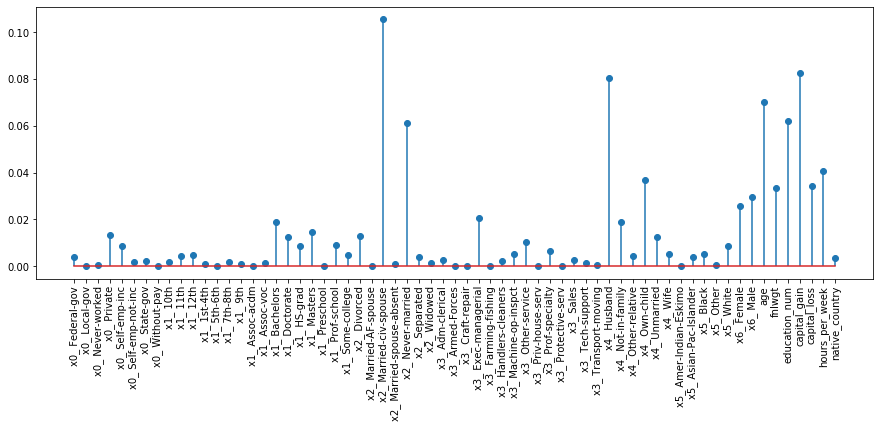

In [421]:
x = featuredf['col_name_ohe']
y = featuredf['score']

plt.figure(figsize=(15,5))
plt.stem(x, y, use_line_collection=True)

plt.xticks(rotation = 90)

plt.show();


##### Accuracy across top 3 models for SelectKBest with mutual info statistic (Report section 4.3.1)

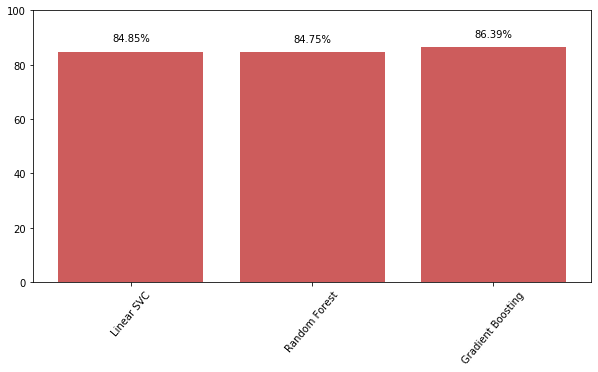

In [422]:
# Report section 4.3.1
plt.figure(figsize=(10,5))
plt.bar(*zip(*Feat_Select4.items()), color = 'indianred')

for x, y in (Feat_Select4.items()):
    label = "{:2.2f}%".format(y)
    
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center


plt.xticks(rotation=50)
plt.yticks(np.arange(0,120,20))
plt.show();

### Wrapper methods

#### Recursive Feature Elimination(RFE) using Logistic Regression algorithm

In [453]:
# Report section 4.3.2

from sklearn.feature_selection import RFE

estimator = LogisticRegression()
rfe= RFE(estimator, 30)
feature_sel = rfe.fit(transformedData, classData)

print("Num Features: %s" % (feature_sel.n_features_))
feat_selected = (np.array(feature_sel.support_)).astype(int)

featuredf = pd.DataFrame()
featuredf['col_names_ohe'] = col_names_ohe
featuredf['feat_selected'] = feat_selected

print('\nSelected Features')
print(featuredf)

print('\nShape before feature reduction')
print(transformedData.shape)

new_data = feature_sel.transform(transformedData)
print('\nShape after feature reduction')
print(new_data.shape)

##Implement the Linear SVC model for the new feature selected data

Feat_Select5 = dict()

## 1) Linear SVC
allResults= []

kf= model_selection.StratifiedKFold(n_splits=6, shuffle=True, random_state=1)

for train_index, test_index in kf.split(new_data, classData):
    clf= LinearSVC(random_state=0)
    clf= clf.fit(new_data[train_index], classData[train_index])

    # predict the class for an unseen example
    results= clf.predict(new_data[test_index])
    allResults.append(metrics.accuracy_score(results, classData[test_index]))

accuracy = (np.mean(allResults) * 100)
Feat_Select5['Linear SVC'] = accuracy
print ("Accuracy for Linear SVC is ", accuracy)



## 2) Random Forest
allResults= []

kf= model_selection.StratifiedKFold(n_splits=6, shuffle=True, random_state=1)

for train_index, test_index in kf.split(transformedData, classData):
    clf= RandomForestClassifier(random_state=0)
    clf= clf.fit(transformedData[train_index], classData[train_index])

    # predict the class for an unseen example
    results= clf.predict(transformedData[test_index])
    allResults.append(metrics.accuracy_score(results, classData[test_index]))

accuracy = (np.mean(allResults) * 100)
Feat_Select5['Random Forest'] = accuracy
print ("Accuracy for Random Forest is ", accuracy)


# 3) Gradient Boosting
allResults= []

kf= model_selection.StratifiedKFold(n_splits=6, shuffle=True, random_state=1)

for train_index, test_index in kf.split(new_data, classData):
    clf= GradientBoostingClassifier(random_state=0)
    clf= clf.fit(new_data[train_index], classData[train_index])

    # predict the class for an unseen example
    results= clf.predict(new_data[test_index])
    allResults.append(metrics.accuracy_score(results, classData[test_index]))

accuracy = (np.mean(allResults) * 100)
Feat_Select5['Gradient Boosting'] = accuracy
print ("Accuracy for Gradient Boosting is ", accuracy)


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

Num Features: 30

Selected Features
                col_names_ohe  feat_selected
0             x0_ Federal-gov              1
1               x0_ Local-gov              0
2            x0_ Never-worked              0
3                 x0_ Private              0
4            x0_ Self-emp-inc              0
5        x0_ Self-emp-not-inc              0
6               x0_ State-gov              0
7             x0_ Without-pay              1
8                    x1_ 10th              0
9                    x1_ 11th              0
10                   x1_ 12th              0
11                x1_ 1st-4th              0
12                x1_ 5th-6th              0
13                x1_ 7th-8th              0
14                    x1_ 9th              0
15             x1_ Assoc-acdm              0
16              x1_ Assoc-voc              0
17              x1_ Bachelors              0
18              x1_ Doctorate              0
19                x1_ HS-grad              0
20                x

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: T

Accuracy for Random Forest is  84.75476695873361
Accuracy for Gradient Boosting is  86.41010577841658


##### Feature Scores for RFE

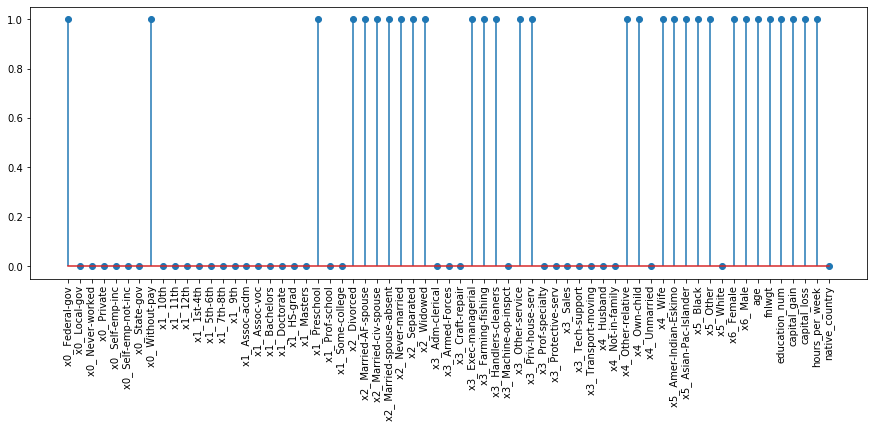

In [454]:
x = featuredf['col_names_ohe']
y = featuredf['feat_selected']

plt.figure(figsize=(15,5))
plt.stem(x, y, use_line_collection=True)

plt.xticks(rotation = 90)

plt.show();

##### Accuracy accross top 3 models for RFE (Report section 4.3.2)

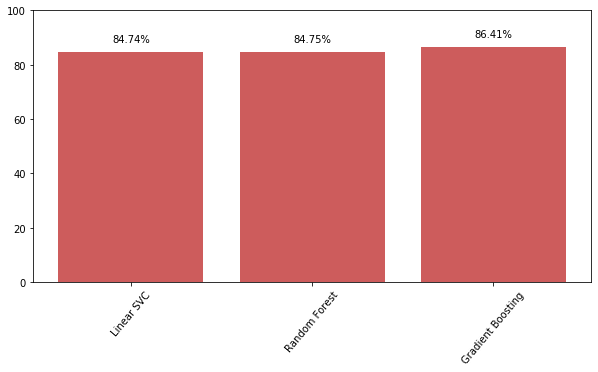

In [456]:
# Report section 4.3.2
plt.figure(figsize=(10,5))
plt.bar(*zip(*Feat_Select5.items()), color = 'indianred')

for x, y in (Feat_Select5.items()):
    label = "{:2.2f}%".format(y)
    
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center


plt.xticks(rotation=50)
plt.yticks(np.arange(0,120,20))
plt.show();

### Embedded Methods

#### Tree Based Method using Random Forest Classifier (Report section 4.3.3)

In [428]:
# Report section 4.3.3

from sklearn.feature_selection import SelectFromModel

# Build a forest and compute the feature importance
selector = SelectFromModel(RandomForestClassifier(n_estimators = 100, random_state= 0))
selector.fit(transformedData, classData)

feat_selected = (np.array(selector.get_support())).astype(int)

featuredf = pd.DataFrame()
featuredf['col_names_ohe'] = col_names_ohe
featuredf['feat_selected'] = feat_selected

print('\nSelected Features')
print(featuredf)

print('\nShape before feature reduction')
print(transformedData.shape)

new_data = selector.transform(transformedData)
print('\nShape after feature reduction')
print(new_data.shape)

##Implement the Linear SVC model for the new feature selected data

Feat_Select6 = dict()

## 1) Linear SVC
allResults= []

kf= model_selection.StratifiedKFold(n_splits=6, shuffle=True, random_state=1)

for train_index, test_index in kf.split(new_data, classData):
    clf= LinearSVC(random_state=0)
    clf= clf.fit(new_data[train_index], classData[train_index])

    # predict the class for an unseen example
    results= clf.predict(new_data[test_index])
    allResults.append(metrics.accuracy_score(results, classData[test_index]))
    
accuracy = (np.mean(allResults) * 100)
Feat_Select6['Linear SVC'] = accuracy
print ("Accuracy for Linear SVC is ", accuracy)



## 2) Random Forest
allResults= []

kf= model_selection.StratifiedKFold(n_splits=6, shuffle=True, random_state=1)

for train_index, test_index in kf.split(transformedData, classData):
    clf= RandomForestClassifier(random_state=0)
    clf= clf.fit(transformedData[train_index], classData[train_index])

    # predict the class for an unseen example
    results= clf.predict(transformedData[test_index])
    allResults.append(metrics.accuracy_score(results, classData[test_index]))

accuracy = (np.mean(allResults) * 100)
Feat_Select6['Random Forest'] = accuracy
print ("Accuracy for Random Forest is ", accuracy)


# 3) Gradient Boosting
allResults= []

kf= model_selection.StratifiedKFold(n_splits=6, shuffle=True, random_state=1)

for train_index, test_index in kf.split(new_data, classData):
    clf= GradientBoostingClassifier(random_state=0)
    clf= clf.fit(new_data[train_index], classData[train_index])

    # predict the class for an unseen example
    results= clf.predict(new_data[test_index])
    allResults.append(metrics.accuracy_score(results, classData[test_index]))

accuracy = (np.mean(allResults) * 100)
Feat_Select6['Gradient Boosting'] = accuracy
print ("Accuracy for Gradient Boosting is ", accuracy)




Selected Features
                col_names_ohe  feat_selected
0             x0_ Federal-gov              0
1               x0_ Local-gov              0
2            x0_ Never-worked              0
3                 x0_ Private              0
4            x0_ Self-emp-inc              0
5        x0_ Self-emp-not-inc              0
6               x0_ State-gov              0
7             x0_ Without-pay              0
8                    x1_ 10th              0
9                    x1_ 11th              0
10                   x1_ 12th              0
11                x1_ 1st-4th              0
12                x1_ 5th-6th              0
13                x1_ 7th-8th              0
14                    x1_ 9th              0
15             x1_ Assoc-acdm              0
16              x1_ Assoc-voc              0
17              x1_ Bachelors              0
18              x1_ Doctorate              0
19                x1_ HS-grad              0
20                x1_ Masters       

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: T

Accuracy for Random Forest is  84.75476695873361
Accuracy for Gradient Boosting is  86.2872637671698


##### Feature scores using tree based method

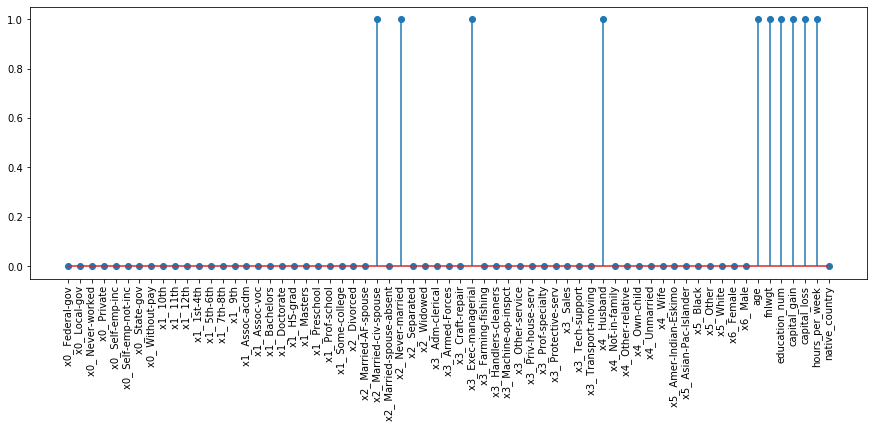

In [429]:
x = featuredf['col_names_ohe']
y = featuredf['feat_selected']

plt.figure(figsize=(15,5))
plt.stem(x, y, use_line_collection=True)

plt.xticks(rotation = 90)

plt.show();

##### Accuracy across top 3 models for tree based methods

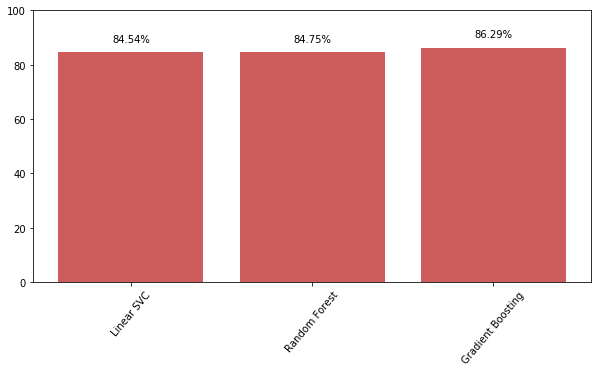

In [430]:
# Report section 4.3.3
plt.figure(figsize=(10,5))
plt.bar(*zip(*Feat_Select6.items()), color = 'indianred')

for x, y in (Feat_Select6.items()):
    label = "{:2.2f}%".format(y)
    
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center


plt.xticks(rotation=50)
plt.yticks(np.arange(0,120,20))
plt.show();